In [4]:
%%HTML
<link rel="stylesheet" type="text/css" href="../css/custom.css">

# ﾁｮｯﾄﾃﾞｷﾙ統計学

### ﾁｮｯﾄﾃﾞｷﾙ統計学とは？
- 統計学の世界を少しだけ覗いてみるという趣旨の勉強会です。
- 基本的なデータの要約方法、可視化、(ﾁｮｯﾄﾀﾞｹ確率)、 ﾁｮｯﾄｼﾀ分析について説明します。
- ~お給料を上げたい一心で~ 頑張ります。

### 始める前に
* この資料はGitHubで公開しているので、お手元の環境で試せます。 ⭐️ つけてくれてもいいです。 
* リポジトリ: `git@github.com:Soichiro-Fujioka/chotto-dekiru-DS.git`
* 実行環境は `python3 + juputer (lab)` ですが、環境構築しなくても `Google Colaboratory` でWEB上でも実行できます。
* スライドで見たい場合は `RISE` モジュールのインストールと `jupyter (not lab)` をご使用ください。
* モジュールは `!pip install pandas` とかでノートブック上でインストール可能です。
* 統計学そのものの勉強会なので, 実際のデータ解析で直接使わないものも出てきます…あしからず…

### まずは必要そうな(!)モジュールをインポート

In [1]:
import pandas as pd   # データを扱うライブラリ
import numpy as np   # 言わずと知れた数値計算ライブラリ
import matplotlib.pyplot as plt # 可視化ライブラリ
import seaborn as sns # イケてる可視化ライブラリ
import statsmodels # 統計手法ライブラリ (scikit-learnは機械学習編で使います)
from scipy.stats import norm, expon # 正規分布可視化用
plt.xkcd() # お気に入り可視化テーマ

### データセットのロード
今回はボストン市の住宅価格のデータを使います。  
他にはアヤメ(`iris`)の分類データや、タイタニックの生存データがチュートリアルでよく使われます。

In [63]:
from sklearn.datasets import load_boston
boston = load_boston() # データのロード
boston_y = pd.DataFrame(boston.target, columns=['PRICE']) # 価格データ
boston_X = pd.DataFrame(boston.data, columns=boston.feature_names) # 価格以外のデータ
boston = pd.concat([boston_y, boston_X], axis=1) # 上二つをがっちゃんこ

In [4]:
boston.head() # とりあえず最初の5行だけ見てみる

,PRICE,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
print('行数: {}   列数: {}'.format(boston.shape[0], boston.shape[1]))

行数: 506   列数: 14


| 変数名 | 説明 |
| --- | --- |
| PRICE | 1,000 ドル台でオーナーが所有する住宅の価格の中央値 単位: 1,000(USD) |
| CRIM | 人口 1 人当たりの犯罪発生数 |
| ZN | 25,000 平方フィート以上の住居区画の占める割合 |
| INDUS | 小売業以外の商業が占める面積の割合 |
| CHAS | チャールズ川によるダミー変数 (1: 川の周辺, 0: それ以外) |
| NOX | NOx の濃度 |
| RM | 住居の平均部屋数 |
| AGE | 1940 年より前に建てられた物件の割合 |
| DIS | 5 つのボストン市の雇用施設からの距離 (重み付け済) |
| RAD | 環状高速道路へのアクセスしやすさ |
| TAX | $10,000 ドルあたりの不動産税率の総計 |
| PTRATIO | 町毎の児童と教師の比率 |
| B	| 町毎の黒人 (Bk) の比率を次の式で表したもの。 1000(Bk – 0.63)^2 |
| LSTAT	| 給与の低い職業に従事する人口の割合 (%) |

ref: [scikit-learn に付属しているデータセット](https://pythondatascience.plavox.info/scikit-learn/scikit-learn%E3%81%AB%E4%BB%98%E5%B1%9E%E3%81%97%E3%81%A6%E3%81%84%E3%82%8B%E3%83%87%E3%83%BC%E3%82%BF%E3%82%BB%E3%83%83%E3%83%88)

### それでは本題

### 統計学って何？

統計学とは、 `確率論` を拠所として、
- ①データの特徴を記述したり -> 平均、分散
- ②一部のデータから全体を推測したり -> 区間推定、仮説検定
- ③出来事の要因を明らかにしたり -> 回帰分析(AI❗️)、時系列解析

する学問

### ①データの特徴を記述

### まずはお馴染みの平均
$$
mean(x) = \bar{x} = \frac{1}{N}(x_1 + x_2 + \cdots + x_N)
$$

In [6]:
boston['PRICE'].mean() # or np.mean(boston['PRICE'])

22.532806324110698

 - 平均値は、データの代表値を表すもっとも手軽な方法ですが、データが偏っている場合は、注意が必要
 - 一般的に使われるのは算術平均ですが、他にも加重平均、幾何平均、調和平均など色々な種類があります

### どんな時に注意が必要？
- 分布が左右対象ではない場合、平均値は引っ張られる
- 平均以外にも中央値、最頻値も利用する
- 実際のデータの形(分布)を見てみることが**超大事**❗️

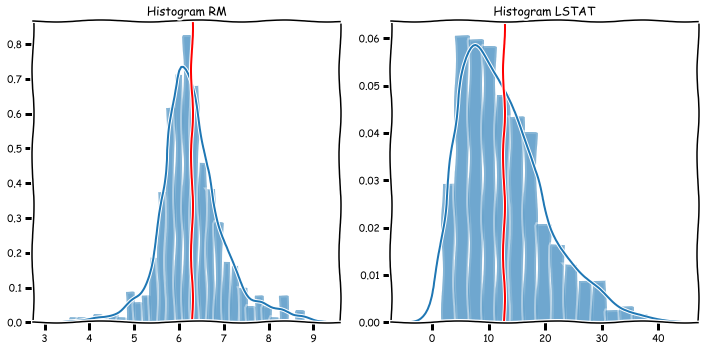

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (10,5)) # 複数グラフの表示設定
sns.distplot(boston.RM, ax=ax1, axlabel='') 
ax1.set_title('Histogram RM')
ax1.axvline(boston.RM.mean(), 0, 1, color='red') #平均の垂直線を追加
sns.distplot(boston.LSTAT, ax=ax2, axlabel='')
ax2.set_title('Histogram LSTAT')
ax2.axvline(boston.LSTAT.mean(), 0, 1, color='red') #平均の垂直線を追加
plt.tight_layout() # グラフが重ならないようにする
plt.show()

### 平均値がダメなら中央値
$$
median(x) = x_{median} =
\begin{cases}
 x_{(N + 1)/2}                                  & \text{if } N \text{ が奇数.} \\
 \dfrac{1}{2}( x_{N/2} + x_{N/2 + 1}) & \text{if } N \text{  が偶数.}
\end{cases}
$$

In [8]:
boston['PRICE'].median() # or np.median(boston['PRICE'])

21.2

- データを順番に並べた際の真ん中の値 (データの数が偶数の場合、真ん中に近い二つのデータの平均)
- 平均値と違い、外れ値の影響受けにくいが、1個のデータでもって代表値としていることに注意
- 実際のデータの形(分布)を見てみることが**超大事**❗️(2回目)

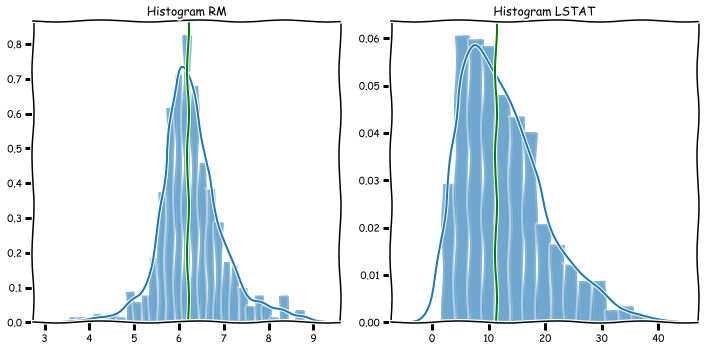

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (10,5)) # 複数グラフの表示設定
sns.distplot(boston.RM, ax=ax1, axlabel='')
ax1.set_title('Histogram RM')
ax1.axvline(boston.RM.median(), 0, 1, color='green') # 中央値の垂直線を追加
sns.distplot(boston.LSTAT, ax=ax2, axlabel='')
ax2.set_title('Histogram LSTAT')
ax2.axvline(boston.LSTAT.median(), 0, 1, color='green') # 中央値の垂直線を追加
plt.tight_layout() # グラフが重ならないようにする
plt.show()

### せっかくなので最頻値も
- 数式で表しにくい~めんどくさい~ので、テストの点数が `10, 20, 30, 30, 40, 50` だとすると、最も出現数が多い `30` が最頻値
- データが離散値ではなく連続値の場合は、`10~19`, `20~29` のように `10` 刻みにして、各階級に落とし込む
- ただし階級幅によって、最頻値が変わることに注意
- 実際のデータの形(分布)を見てみることが**超大事**❗️(n回目)

#### 参考までに・・・スタージェスの公式 *Sturges' formula*
- データの個数Nが与えられた時に**目安となる**階級幅kを得る公式
$$
k = \log_2 N + 1 
$$

In [10]:
stur = np.ceil(np.log2(boston.shape[0]) + 1)
print(stur)

10.0


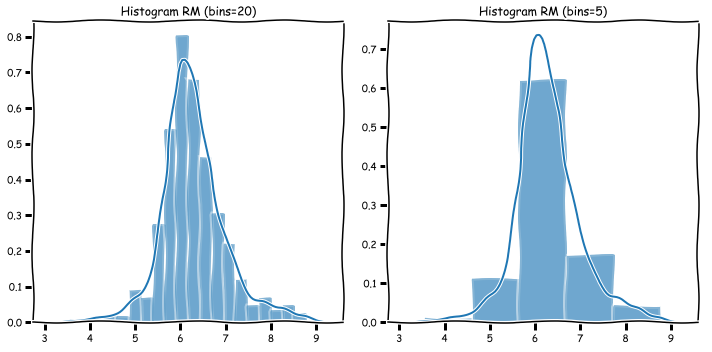

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (10,5)) # 複数グラフの表示設定
sns.distplot(boston.RM, ax=ax1, axlabel='', bins=20) # binsは階級幅ではなく、階級の個数であることに注意
ax1.set_title('Histogram RM (bins=20)')
sns.distplot(boston.RM, ax=ax2, axlabel='', bins=5)
ax2.set_title('Histogram RM (bins=5)')
plt.tight_layout() # グラフが重ならないようにする
plt.show()

### データのばらつきもみよう-分散
$$
{\sigma}^{2}=\frac{1}{N}\sum_{i=1}^{n}(x_{i} - \bar{x})^2
$$

In [12]:
boston['PRICE'].var(ddof=0) # or np.var(boston['PRICE']) 

84.4195561561656

- データがどれくらいばらついているかを測る指標
- 分散に平方根をとると **標準偏差** と呼ばれる指標になります
- 上のコードのddofは、degree of freedom(自由度)と呼ばれる少々ややこしい概念ですが、今回は省略します。Pandasではddof=1, Numpyではddof=0がデフォルトです。
- ddof=1の場合、$N$ ではなく $N-1$ で割ります。

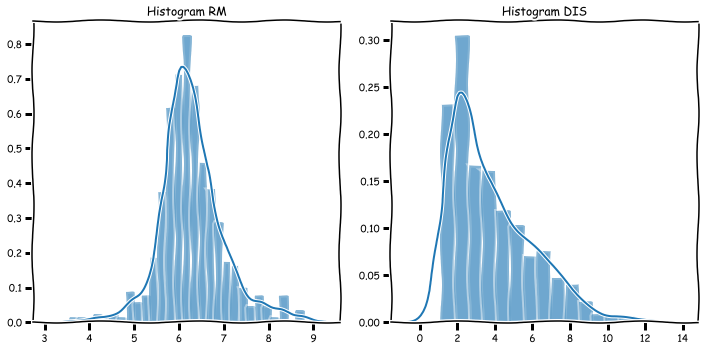

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (10,5)) # 複数グラフの表示設定
sns.distplot(boston.RM, ax=ax1, axlabel='')
ax1.set_title('Histogram RM')
sns.distplot(boston.DIS, ax=ax2, axlabel='')
ax2.set_title('Histogram DIS')
plt.tight_layout() # グラフが重ならないようにする
plt.show()

In [14]:
RM_var = boston['RM'].var(ddof=0)
DIS_var = boston['DIS'].var(ddof=0)
print('RM_var: {}    DIS_var: {}'.format(RM_var, DIS_var))

RM_var: 0.49269521612976347    DIS_var: 4.425252261616489


### 予想通りDISの方が分散が大きい！ <- 実は罠です💀
- 分散の単位は、データの単位の2乗になるので、単純な比較はできない
- 変動係数を使いましょう！
- 変動係数は標準偏差(=つまり元のデータと同じ単位)を元のデータの単位で割るので、単位がない無名数になります
$$
C.V.=\frac{\sigma} {\overline x}
$$

In [15]:
RM_cv = np.sqrt(RM_var) / boston.RM.mean()
DIS_cv = np.sqrt(DIS_var) / boston.DIS.mean()
print('RM_cv: {}    DIS_cv: {}'.format(RM_cv, DIS_cv))

RM_cv: 0.1116886792567013    DIS_cv: 0.5543095373172995


#### 参考までに・・・標準化
- データの種類によって, 平均と分散が違うため、主に機械学習分野で学習結果の数値安定性を高めるために, 平均を0, 分散を1に変換する手法がよく使われます.
- 統計学分野では、後に解説する `推定`, `検定` 分野で使われます.
$$
z_{i} = \frac{x_{i} - \bar{x}} {\sigma}
$$

#### もうちょっと参考までに・・・偏差値
- 偏差値は標準化のバリエーションの一つで、平均を50, 分散を10に変換したものです。
$$
z'_{i} = 50 + \frac{10(x_{i} - \bar{x})} {\sigma}
$$

### ここまでのまとめ
- 代表値を表す指標は平均の他に、中央値、最頻値などがあります.
- データのばらつきを示す指標として、分散や標準偏差があります.
- 代表値だけでは、データの特性を見落としてしまうことがあるため、可視化することが重要❗️

今まで行った計算(の一部)はpandasの`describe`メソッドでも確認することができます。**基本(要約)統計量**とも呼ばれます。

In [16]:
boston.describe()

,PRICE,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### 2変量の関係をみてみる
- 今までは一つのデータについて着目しましたが、実際にはデータの種類が一つしかないということは希です
- そこで2つのデータの関係性を説明する **散布図** と **相関係数** について説明します

### 散布図
- 二つのデータを、それぞれ *X* , *y* とし、それをプロットしたグラフ.
- 二つのデータの関係が直感的に見て取れます.
- 男女などのカテゴリカルな変数で色分けすると, データの特性をさらに深掘りできます.(今回のデータは全て連続値です)

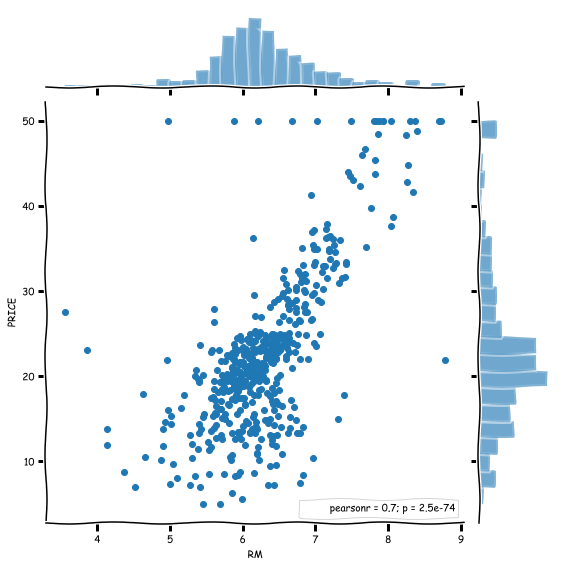

In [17]:
sns.jointplot(data=boston, x='RM', y='PRICE', size=8) #  kind='hex' オプションでヒートマップ表示をすることも可能
plt.show()

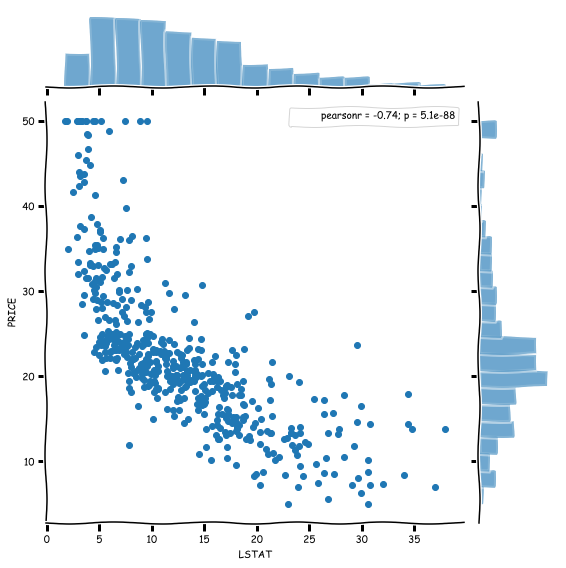

In [18]:
sns.jointplot(data=boston, x='LSTAT', y='PRICE', size=8)
plt.show()

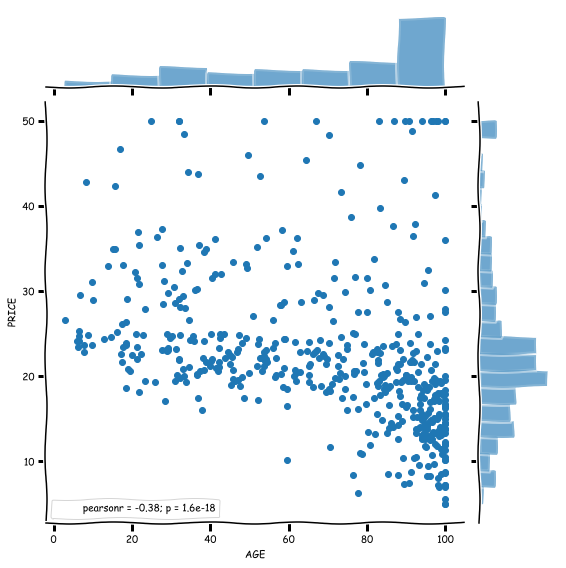

In [19]:
sns.jointplot(data=boston, x='AGE', y='PRICE', size=8)
plt.show()

### データの関係を数値として表す-相関係数
$$
\rho_{xy} 
 = 
 \frac{ \displaystyle 
  \sum_{i=1}^{n} (x_{i}-\bar{x})(y_{i}-\bar{y}) 
 }{ 
  \bigg(\Big( \displaystyle \sum_{i=1}^n(x_{i}-\bar{x})^2 \Big)\Big( \sum_{i=1}^n(y_{i}-\bar{y})^2 \Big)\bigg)^{1/2}
 }
 =
 \frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}
$$

- 相関係数は二つのデータの **直線** を基準とした関係の指標で, -1から1範囲で値を取ります.
- データAが増えた時, データBの値も増えるなら、相関係数は正の値を取ります(=正の相関).
- データAが増えた時, データBの値が減るなら、相関係数は負の値を取ります(=負の相関).
- 二つのデータに関係がなければ、相関係数は0 (=無相関)

*PRICE* VS *RM*

In [20]:
np.corrcoef(boston.PRICE, boston.RM)[0][1]

0.6953599470715396

*PRICE* VS *LSTAT*

In [21]:
np.corrcoef(boston.PRICE, boston.LSTAT)[0][1]

-0.7376627261740147

*PRICE* VS *AGE*

In [22]:
np.corrcoef(boston.PRICE, boston.AGE)[0][1]

-0.3769545650045963

### 実際にはデータは種類複数あるので, 相関行列として一度に出した方が便利です
- よく使われるのピアソンの相関係数ですが, 他にケンドールの順位相関, スピアマンの順位相関係数などがあります.
- pandasの`corr` メソッドの引数`method`で'pearson', 'kendall', 'spearman'を指定します.

In [23]:
boston_corr = boston.corr(method='pearson')
boston_corr

,PRICE,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
PRICE,1.000000,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.388305,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360445,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175260,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.427321,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


### ただ, 見にくいので, ヒートマップで表示しがちです

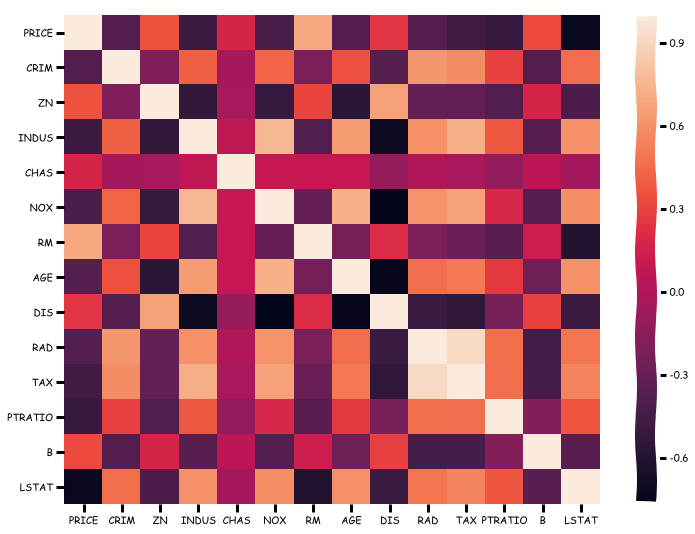

In [24]:
fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(boston_corr)
plt.show()

### ご使用上の注意
- 相関係数はあくまで相関を表すだけで, 因果関係を表す訳ではない！
- 世の中には、同じ傾向(もしくは正反対の傾向)をもつテキトーなデータを二つとってきて, 関係がある！相関係数ﾊﾞｰﾝ!みたいな記事がはびこってます.
- 統計学には, 因果関係を扱う一大分野, `統計的因果推論` というものがありますが, **沼** です. めっちゃ難しいです.
- 相関係数は, 直線的な関係を表すので, その値だけを見て判断すると, データの特徴を見落としてしまいます.
- 実際にデータの関係を見てみることが**超大事**❗️(n+1回目)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/2880px-Correlation_examples2.svg.png" alt="相関係数" title="相関係数">

#### 参考までに・・・擬似相関
- (架空の例ですが) ある学校全体で生徒の体重と, 学力の関係を調べたところ, 相関係数が0.8でした.
- **体重が大きいと学力も高いから, いっぱい飯を食わせよう!** と結論付けても大丈夫なのでしょうか?
- 実際には, 年齢UP -> 学力UP, 年齢UP -> 体重UPと考えるのが自然で, 体重と学力は関係なさそうに見えます.
- このように, 別の要因が原因で相関があるように見えてしまうことを, 擬似相関(見せかけの相関)と呼びます.
- この場合, ある要因を取り除いた相関, **偏相関係数** を求めるのが適切です.
$$
\rho_{XY\cdot Z } =
        \frac{\rho_{XY} - \rho_{XZ}\rho_{ZY}}
             {\sqrt{1-\rho_{XZ}^2} \sqrt{1-\rho_{ZY}^2}}.
$$

#### もっと参考までに・・・21世紀の相関係数-MIC
- 相関係数が世に出てから100年以上経ってますが, 最近では直線以外(つまり非線形)のものも扱えるMICという指標も出ています.
- `minepy` をインストールすれば試せます.
- ref: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3325791/

①データの特徴を記述する はここまで👍

統計学とは、 `確率論` を拠所として、
- <span style="color: gray; ">①データの特徴を記述したり -> 平均、分散</span>
- <span style="color: black; ">②一部のデータから全体を推測したり -> 区間推定、仮説検定</span>
- <span style="color: gray; ">③出来事の要因を明らかにしたり -> 回帰分析(AI❗️)、時系列解析</span>

する学問

### ②一部のデータから全体を推測する

### ここから学問っぽくなります (なんとなーく聞いてもらえたらと思います

### 母集団と標本

<img src="https://nces.ed.gov/blogs/nces/image.axd?picture=%2f2016%2f04%2fSampleSurvey.jpg" alt="相関係数" title="相関係数">

- 統計学では、調べる対象が全体なのか, 一部なのかをﾊｯｷﾘと区別する必要があります
- 例えば, 全人類について調査したい場合, 全人類を母集団, 日本人だけ調査するなら, それが標本になります.
- 数学的に **一部のデータから全体を把握する** のが統計学の大きなモチベーションの一つです.

### ランダムサンプリングはﾁｮｰ大事❗️

- 一部のデータから全体を把握するためには, データを母集団からランダム(無作為)に抽出することが不可欠です. このランダムが数学的に解析できる拠り所となっています.
- 母集団を全人類として, 日本人を標本とした場合、ランダムではないため偏った分析結果が出てしまう❌
- 単純にランダムサンプリングするのが最も簡単ですが, 母集団から完全にランダムにサンプリングするのは難しい…(><)
    - 層別抽出法
    - クラスター抽出法
    - 多段抽出法  

### どうやって全体を把握する❓
- ﾊﾟｯと思いつくのは, 標本の平均を, 母集団の平均とし, 標本の分散を母集団の分散と同じとみなすのですが、これで大丈夫なのでしょうか?
- 先に答えを言うと, 先に説明した公式では, 平均についてはだいたい大丈夫だけど, 分散についてはﾁｮｯﾄ惜しいです.
- ここから母集団の平均, 分散を, **母平均** , **母分散** , 標本の平均, 分散を **標本平均**, **母分散** と区別します

### ちょっと乱数を生成してみる

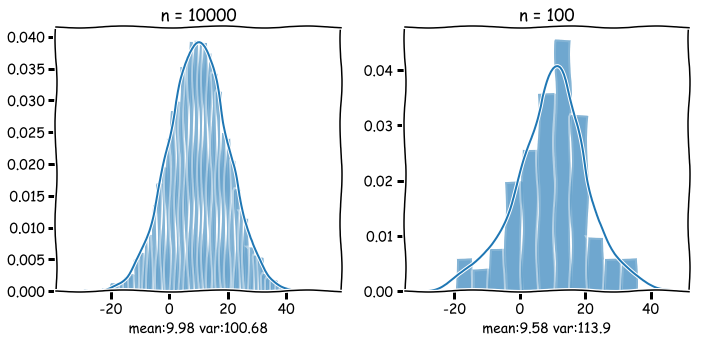

In [60]:
SIZE = 10000
SAMPLE = np.int(SIZE * 0.01) # 1%を抽出

np.random.seed(seed=42)
data_all = np.random.normal(loc=10, scale=10, size = SIZE)  # SIZE個の乱数を生成 シード値固定
np.random.seed()
data_sampled = np.random.choice(data_all, SAMPLE, replace=False) # SAMPLE個をサンプリング シード値はランダム

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (10,5)) # 複数グラフの表示設定
sns.distplot(data_all, ax=ax1, axlabel='mean:{} var:{}'.format(np.around(np.mean(data_all), decimals=2), np.around(np.var(data_all), decimals=2))) 
ax1.set_title('n = {}'.format(SIZE))
sns.distplot(data_sampled, ax=ax2, axlabel='mean:{} var:{}'.format(np.around(np.mean(data_sampled), decimals=2), np.around(np.var(data_sampled), decimals=2)))
ax2.set_title('n = {}'.format(SAMPLE))
plt.tight_layout() # グラフが重ならないようにする
plt.show()

### なんとなーく形が似ている？
- 何回か動かしてみると, 似た形のヒストグラムができたり, できなかったり… でも似ている形の方が多い
- テッペンもだいたい `10` になっている…けど `10` じゃないかも
- でもサンプリングされたデータから, **だいたいこんなもん** というのを明らかにはできそう
- **だいたいこんなもん…** 確率の出番だ！
    - サイコロでのある目が出る確率は $\frac{1}{6}$ だけど、きっかり $\frac{1}{6}$ の割合で出る訳ではない.
    - つまり確率との相性は良さそう

### はっきりとした形はわからないけど、母集団の形をモデル化してみる
- 統計学で(個人的に)一番大事な **確率変数** と **確率分布** が強力な武器になります.
- `確率変数`: ある値をとる確率が存在する変数
    - サイコロの目 (1になる確率は $\frac{1}{6}$, 2になる確率は $\frac{1}{6}$ …
- `確率分布`: 確率変数の実現値を生成する元となるもの (雑な説明です)
- (ほとんどの)確率分布は平均と分散が計算できる

### サイコロの確率分布を表してみる
- 確率変数の実現値は1, 2, 3, 4, 5, 6
- それぞれの値がとる確率はすべて $\frac{1}{6}$

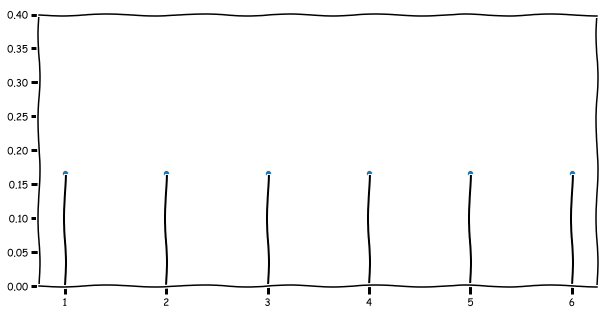

In [18]:
unidata = {'x': [1, 2, 3, 4, 5, 6], 'p': [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]}
fig, ax = plt.subplots(1, 1, sharey=False, figsize = (10,5)) 
sns.scatterplot(x='x', y='p', data=unidata)
ax.set_ylim(0, 0.4)
for i in range(6):
    ax.axvline(i+1, 0, (1/6)/0.4-0.01, color='black') 

### サイコロは一様分布に従う
- ある範囲内で一定の確率をとる分布を **一様分布** と呼びます.
- 確率を生成する関数を **確率関数(確率密度関数)** と呼び, 一様分布では, 以下のように定義されます.

$$
f(x) = \frac{1}{N}　x={1, 2, ..., N}
$$

- 一様分布に限らず, たくさんの確率分布が定義されています.
    - 正規分布, ベルヌーイ分布, 二項分布, ポアソン分布, t分布, ベータ分布, 多変量正規分布, ロジスティック分布などなど…
- この中で最も有名かつ重要な **正規分布** だけを解説します.

### 一番有名な確率分布, 正規分布！！！！
- 正規分布は左右対称のつりがね型の確率分布で, 平均 $\mu$ と分散 ${\sigma}^{2}$ をパラメータに持ちます
- 身長の分布や,  お菓子の内容量は正規分布に従うことが多いです
- 社会科学的なデータは, 偏りを持つことが多く正規分布に従わないことが多いですが, 対数化などの変換を行うことで正規分布に従うことがあります.
- 数学的に望ましい性質を備えているため, 色々な分析手法に, この正規分布が仮定されていることが多いです.

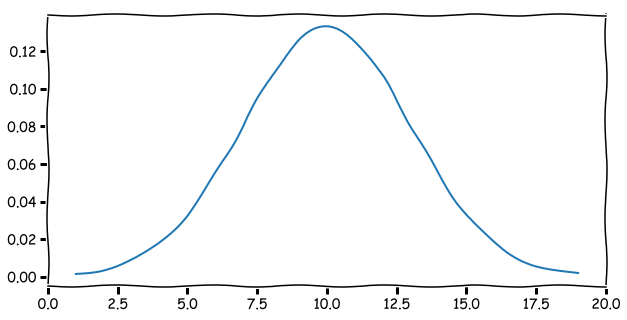

In [61]:
MU = 10   # pattern 8, 10, 12
SIGMA = 3 # pattern 1, 2, 3
x = np.linspace(MU-3*SIGMA, MU+3*SIGMA, 101) 
fig, ax = plt.subplots(1, 1, sharey=False, figsize = (10,5)) 
plt.xlim(0, 20)
plt.plot(x, norm.pdf(x, loc=MU, scale=SIGMA))
plt.show()

### 正規分布の確率密度関数はこんな感じ
- 入力: x
- パラメータ: $\mu$, $\sigma$

$$
f(x|\mu, \sigma)=\frac{1}{\sqrt{2\pi \sigma^2}} \exp \! \left( -\frac{(x-\mu)^2}{2\sigma^2} \right)
$$

- ちなみに正規分布はド・モアブルさんによって1733年に導入されました.長い歴史ですね.
- 他には, 平均$\mu$から$2\sigma$以内に収まる確率は95.45%, $3\sigma$以内に収まる確率は99.73%であることが知られているので, 調査したい対象が正規分布に従っていると見なし, その範囲外であれば異常値とする, みたいな使い方もできます.
- また確率変数が正規分布に従うとき以下のように書くこともあります.
$$
X \sim N(\mu, \sigma^2)
$$

### 確率分布と母集団, 標本との関係
少し話がややこしくなってきたので, 一旦ここでまとめると
- 母集団はある確率分布に従う (と仮定する)
- 標本は, その確率分布から得られた値 (すなわち確率変数の実現値)
- 最終目標は標本から, 母集団の特徴, つまり平均や分散などを求める.

### 点推定と区間推定

母集団の特徴を把握するには, 主に二つの方法があります. 
- 母集団の平均と分散はこの値ダ!と決めてしまう
- 母集団の平均と分散はだいたいこの辺りだろうと決める

前者の**点推定**, 後者を**区間推定** と言います.  
母集団をモデル化, すなわち確率分布に従うという仮定をすることで, 数学的に計算できるようになります.

### 平均と分散を点推定する
ここでは点推定の一つである `不偏推定量` について説明します。(他には最尤推定, モーメント推定, ベイズMAP推定などなど…  

不偏, つまち偏りがないとは, 標本から計算した平均や分散(ここでは一括りに $\hat{\theta}$ として)の平均(期待値)が, 母集団の平均や分散($\theta$)のそれと同じであることをいいます. 
$$
E(\hat{\theta}) = \theta
$$

証明自体は簡単ですが, ここでは結果だけ説明すると, 標本の算術平均の期待値は母平均と等しく, 標本の**$N-1$** で割った分散の期待値は母分散と等しくなります.

- $\hat{\mu} = \frac{1}{N} \sum_{i=1}^{N}x_i$
- $\hat{{\sigma}}^{2}=\frac{1}{N-1}\sum_{i=1}^{N}(x_{i} - \bar{x})^2$

(pandasの分散(`var`メソッド)がデフォルトで $N-1$ で割っている理由はこれです.



In [65]:
# bostonデータセットのPRICEについて点推定
mean = boston['PRICE'].mean() # or np.mean(boston['PRICE'])
var = boston['PRICE'].var(ddof=1) # or np.var(boston['PRICE'])
print("mean: {}\nvar: {}".format(mean, var))

mean: 22.532806324110698
var: 84.5867235940986


### 平均を区間推定する
ここでは平均の区間推定について説明します. (もちろん分散の区間推定もできますが, 正規分布とは別の確率分布が必要になるので割愛します…  

区間推定のミソ
- 平均を区間推定するので, **平均の確率分布**を考える (母集団の確率分布ではないヨ！)
- 平均の確率分布を考えるので, 平均の平均(期待値)と分散の平均(期待値)を求める
- (ここでは)母集団が正規分布に従うと考える

### 平均の確率分布を試してみる
平均の確率分布は直感的に分かり辛いので, 実際に試してみます.

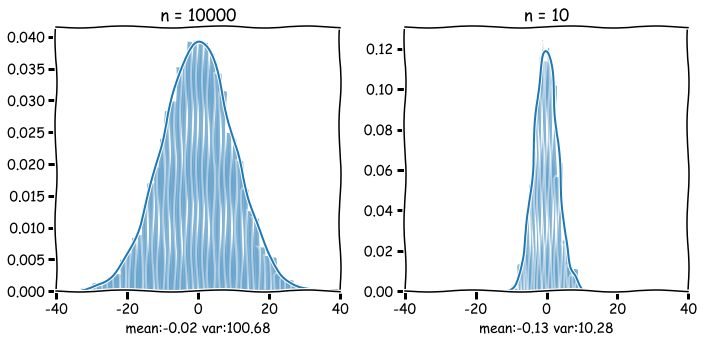

In [126]:
SIZE = 10000
SAMPLE = np.int(SIZE * 0.001) # ここの割合を変えると, 標本平均の分散が変わります.
SUMPLE_COUNT = 1000

np.random.seed(seed=42)
data_all = np.random.normal(loc=0, scale=10, size = SIZE)  # SIZE個の正規分布に従う乱数を生成 シード値固定
np.random.seed()

# 標本平均を格納するリスト
data_sampled_list = [np.mean(np.random.choice(data_all, SAMPLE, replace=False)) for _ in range(SUMPLE_COUNT)]

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (10,5)) # 複数グラフの表示設定
sns.distplot(data_all, ax=ax1, axlabel='mean:{} var:{}'.format(np.around(np.mean(data_all), decimals=2), np.around(np.var(data_all), decimals=2))) 
ax1.set_title('n = {}'.format(SIZE))
ax1.set_xlim(-40, 40)
sns.distplot(data_sampled_list, ax=ax2, axlabel='mean:{} var:{}'.format(np.around(np.mean(data_sampled_list), decimals=2), np.around(np.var(data_sampled_list,ddof=1), decimals=2)))
ax2.set_title('n = {}'.format(SAMPLE))
ax2.set_xlim(-40, 40)
plt.tight_layout() # グラフが重ならないようにする
plt.show()

### 標本平均の分布も正規分布っぽい？
母集団のヒストグラムと, 標本平均のヒストグラムを比べてみると

- 平均はおおよそ同じ
- 分散は標本平均の分散の方が小さい (標本の分散ではないヨ!)

これはたまたまではなくて, 数学的に以下のことがわかっています. (↓雑な証明です

- $E[\bar{x}] = \frac{1}{N}E[X_{1} + X_{2} + \cdots + X_{N}] = N\frac{1}{N}\mu = \mu$
- $V[\bar{x}] = \frac{1}{N^2}V[X_{1} + X_{2} + \cdots + X_{N}] = \frac{1}{N^2}N\sigma^2 = \frac{\sigma^2}{N}$

まとめると

- 標本平均の期待値は母集団の期待値と同じ
- 標本平均の分散はサンプリングの回数が多いほど, 小さくなる.


### ここまでくれば区間推定できます!
- 標本平均の分布の特徴がなんとなくわかったところで, 区間推定なので, 具体的な区間を決める必要があります.  
- 統計学では慣習的に確率分布の95%とか99%をその範囲に定めることが多いです. (統計学の唯一の数学ではないところは, この95%, 99%の根拠だったりします.  
- ではひとまず, 正規分布での95%での範囲を見てみます. 

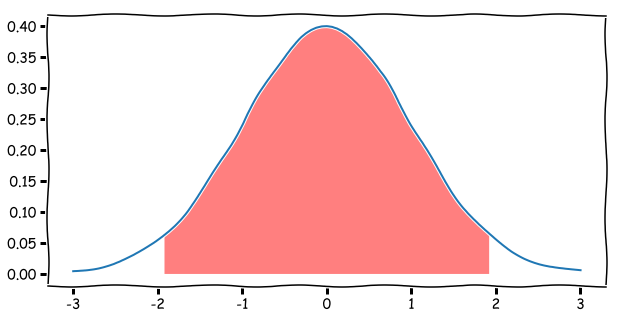

lower = -1.9599639845400545
upper = 1.959963984540054


In [144]:
MU = 0   # pattern 8, 10, 12
SIGMA = 1 # pattern 1, 2, 3
x = np.linspace(MU-3*SIGMA, MU+3*SIGMA, 101) 
fig, ax = plt.subplots(1, 1, sharey=False, figsize = (10,5)) 
lower = norm.ppf(q=0.025, loc=0, scale=1) #下から2.5%点
upper = norm.ppf(q=0.975, loc=0, scale=1) #下から97.5%点
x_95 = x[np.where((x > lower) & (x < upper))]

p = norm.pdf(x, loc=MU, scale=SIGMA)
plt.fill_between(x_95, norm.pdf(x_95, loc=MU, scale=SIGMA), facecolor='red', alpha=0.5)

plt.plot(x, p)
plt.show()
print('lower = {}\nupper = {}'.format(lower, upper))

### 95%の範囲とは, 確率分布の面積が0.95となる範囲
- 確率分布の面積(とりうる範囲内での積分値)は1なので, 平均(期待値)を真ん中として, 上側, 片側から0.25ずつ削ったものが95%の区間になります.
- そしてその取りうる範囲(先ほどの例では-1.96から1.96)を**95%信頼区間**と言います.
- 区間推定では, **だいたいこの辺りに**母集団の平均が含まれているだろうと考えます.

図示した例だと平均0, 分散1の正規分布で計算しましたが, コード上での`MU`, `SIGMA` を変更することで, 色々な区間推定を行うことができます.

### ちょっとやってみる
- 前提条件として, 母集団が正規分布, 母集団の分散が既知の場合を考えてみます. 
- (母集団の分散が未知の場合は, 正規分布は使えず, `t分布` で計算するのが正しいです.
- `SIGMA` の値を大きくすると, その分信頼区間の幅を広くなります. (ばらつきが大きくなって不確実性が高まる

In [243]:
MU = 10 # 母平均10
SIGMA = 10 # 母分散100 (10*10)
SIZE = 100
SAMPLE = np.int(SIZE * 0.1) # 1%を抽出

np.random.seed(seed=42)
data_all = np.random.normal(loc=10, scale=SIGMA, size = SIZE)  # SIZE個の乱数を生成 シード値固定
np.random.seed()
data_sampled = np.random.choice(data_all, SAMPLE, replace=False) # SAMPLE個をサンプリング シード値はランダム
mean_sampled = np.mean(data_sampled) # 標本平均を計算
lower = norm.ppf(q=0.025, loc=mean_sampled, scale=SIGMA) #下から2.5%点 (scaleに母標準偏差を使っていることに注意！)
upper = norm.ppf(q=0.975, loc=mean_sampled, scale=SIGMA) #下から97.5%点 (scaleに母標準偏差を使っていることに注意！)
print('lower = {}\nupper = {}'.format(lower, upper))

lower = -14.324630552140365
upper = 24.874649138660722


### 使用上の注意
- 例えば95%信頼区間が-1から1の範囲だった場合, 
- 母集団の平均が-1から1の間である確率が95%であると解釈するのは**誤り**！
- 同じ測定(cf: i.i.d)を行えば, **確率的に20回の内, 19回は母集団の平均が信頼区間の中に入る**が正しい解釈です.
- わかります.ヤヤコシイですよね… (ちなみにベイズ推定の枠組みでは, 設定したモデルを前提に, 95%の確率で平均がココからココと解釈することができます.

### 正規分布, 正規分布って言ってるけど, それ以外はどうなのさ？
- ここまでは正規分布を前提で話を進めてきましたが, 正規分布を仮定できない場合どうすればいいのでしょうか？
- 母集団の分布が分かっていれば, その分布の95%信頼区間を求めることで計算することができます
- 先ほどのコードで言うところの `norm.ppf` を `poisson.ppf` (ポアソン分布)にするとできます
- 標本平均の分布の期待値, 分散は確率分布の形状に依存しません
- ですが、実際のデータ解析では母集団の分布がわからないことが多いのではないでしょうか？

### 統計学で最も有名な定理 - 中心極限定理
- 実際のデータ解析は, 母集団の分布がわからなかったり, わかっているけど計算量が多く, 扱い辛い場合が多々あります.
- そんなときに役に立つのが確率変数の極限の定理である **中心極限定理** です.

**中心極限定理**
- 確率変数の和(or平均)の分布の極限は正規分布に従う.つまり

$$
S_n = \sum_{k=1}^{n}X_i\\
S_n \sim N(n\mu, n\sigma^2)\qquad(as \quad n\rightarrow\infty)\\
\frac{1}{n}S_n \sim N(\mu, \frac{\sigma^2}{n})\qquad(as \quad n\rightarrow\infty)\\
$$

- 実際のデータ解析ではこの定理を平均に適用することが多いです.(和の分布だと分散が大きくなってしまうため
- ほとんどの確率分布に適用できますが, 分散が発散しない, 同一の確率分布からの確率変数とかいくつかの条件があります

### これもちょっと実験してみる
元の確率変数に指数分布を仮定して実験してみます.  
ちなみに指数分布の確率関数とその形状はこんな感じです.
$$
f(x|\lambda) = e^{-\lambda x}
$$

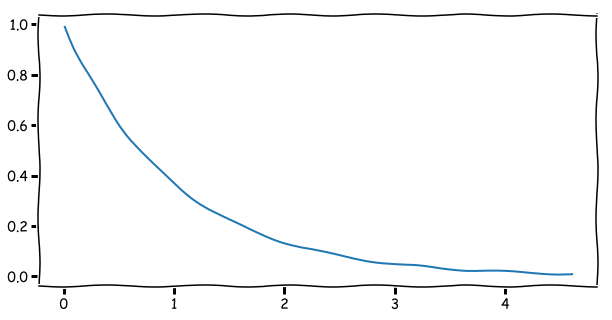

In [287]:
MU = 5
x = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1, sharey=False, figsize = (10,5)) 
plt.plot(x, expon.pdf(x))
plt.show()

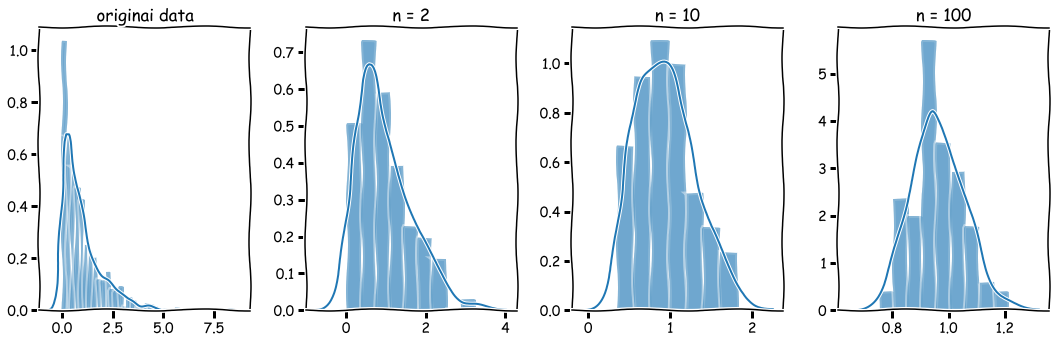

In [302]:
SIZE = 1000
SAMPLE = [2, 10, 100]
SUMPLE_COUNT = 100

rv = expon()
np.random.seed(seed=42)
data_all = rv.rvs(size=SIZE, random_state=42)
np.random.seed()
# 標本平均を格納するリスト
sample_10   = [np.mean(np.random.choice(data_all, SAMPLE[0], replace=False)) for _ in range(SUMPLE_COUNT)]
sample_100  = [np.mean(np.random.choice(data_all, SAMPLE[1], replace=False)) for _ in range(SUMPLE_COUNT)]
sample_1000 = [np.mean(np.random.choice(data_all, SAMPLE[2], replace=False)) for _ in range(SUMPLE_COUNT)]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=False, figsize = (15,5)) # 複数グラフの表示設定
sns.distplot(data_all, ax=ax1)
ax1.set_title('originai data')
sns.distplot(sample_10, ax=ax2)
ax2.set_title('n = {}'.format(SAMPLE[0]))
sns.distplot(sample_100, ax=ax3)
ax3.set_title('n = {}'.format(SAMPLE[1]))
sns.distplot(sample_1000, ax=ax4)
ax4.set_title('n = {}'.format(SAMPLE[2]))
plt.tight_layout() # グラフが重ならないようにする
plt.show()

### だいたいn=100くらいで正規分布になる
- nの数を増やしていくと, だんたんと正規分布に近づくのがわかります.
- データが十分にあるとき, $\bar{x}$と$\frac{Var(x)}{n}$を計算すれば, 正規分布を元にして区間推定を行っても問題ないということですね
- `データが十分にあるとき`の具体的な数については, 標本は確率的に変動するので確実ではないですが、だいたい100くらいあれば良いとされています. 出典「」

#### 参考までに…
- そもそも確率分布を仮定せずに議論を進める `ノンパラメトリック手法` という分野も存在します
- 今まで出てきたヒストグラムの近似曲線もノンパラメトリック手法です.
- 機械学習もノンパラメトリックな手法に分類される(と私は思っています.違うという人もいます)

### 推定と検定
- これまでは標本から母集団を把握するという, **推定** について解説してきました.
- 統計学には推定と表裏の関係にある **仮説検定** と呼ばれる分野が存在します. 
- これはある推定量(平均とか分散)が得られたときに, その値の妥当性を統計的に検証するものです.いわゆるテストです.
- 新薬の妥当性の検証や, 心理学的に男は～女は～とかの議論は, このテストのクリアでもって主張されていることがほとんどです.
- 機械学習では予測性に重きをおきますが, 統計学では結果の妥当性の重きを置いています

ただ ~~疲れたので~~ とっつきにくい議論ではあるので, ざっくりとだけ解説します.

### 仮説検定 (クセがあります)☔️☔️☔️
- 仮説検定の目的
    - 分析結果が誤差の範囲内なのか, 何か意味のあるものかを判断することです.
- 例えばマーケティングの場合 
    - 施策に対して売り上げが上がった時, それが偶然なのか, それとも意味があったのか判断するのに使います. (A/Bテスト)
    - もし効果があると認められた場合, それは **統計的に有意** であると言います.

### 仮説検定の考えかた (クセがあります)
- 仮説検定では二つの仮説を設定します
    - 帰無仮説 $H_0$ (`null hypothesis`)
    - 対立仮説 $H_1$ ( `alternative hypothesis` )
- 先ほどのマーケティングの例だと以下のような感じです.
    - 帰無仮説 $H_0$ 施策に効果はない
    - 対立仮説 $H_1$ 施策に効果がある

### なぜ二つも仮説を立てるの？
- 有意性検定の枠組みでは, 帰無仮説が起こり得ないことを示すことで, 対立仮説を支持します.
- マーケティングの例だと, 施策に効果がない可能性は限りなく低い -> 施策に効果があると結論付けます.
- ﾒｯﾁｬ周りくどいですよね

### 架空の(？)例を考えてみる
- 唐揚げが好きなF氏はある日, ランチの唐揚げが少し大きいことに気づきました.
- その日の唐揚げの重さは, `[45, 40, 46, 44, 50, 41, 43]`g, 平均44.1gでした.
- お店の人から, 唐揚げの重さは, 平均42g, 分散11の正規分布に従うことがわかっています.
- この日の唐揚げは大きかったと結論付けて問題ないでしょうか？
- ref https://tabelog.com/osaka/A2701/A270101/27084712/

### 仮説を立ててみる
- 帰無仮説 $H_0: \mu=44.1$ 
- 対立仮説 $H_1: \mu\neq 44.1$

ここで $\mu$は母集団の平均で, 標本平均44.1が母平均42と比較して, 誤差の範囲内かどうかを確かめていきます.

### 帰無仮説の元での確率を計算してみる
- 母集団は$N(42, 11)$の正規分布に従う
- 標本平均の分布は$N(42, \frac{11}{7})$の正規分布に従う
- $N(42, \frac{11}{7})$の時に44.1が出る確率を求める！

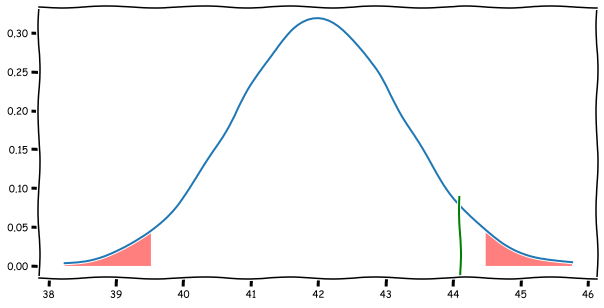

In [20]:
MU = 42
SIGMA = np.sqrt(11/7)
x = np.linspace(MU-3*SIGMA, MU+3*SIGMA, 101) 
fig, ax = plt.subplots(1, 1, sharey=False, figsize = (10,5)) 
plt.plot(x, norm.pdf(x, loc=MU, scale=SIGMA))
lower = norm.ppf(q=0.025, loc=MU, scale=SIGMA) #下から2.5%点
upper = norm.ppf(q=0.975, loc=MU, scale=SIGMA) #下から97.5%点
x_lower = x[np.where(x < lower)]
x_upper = x[np.where(x > upper)]
plt.fill_between(x_lower, norm.pdf(x_lower, loc=MU, scale=SIGMA), facecolor='red', alpha=0.5)
plt.fill_between(x_upper, norm.pdf(x_upper, loc=MU, scale=SIGMA), facecolor='red', alpha=0.5)
ax.axvline(44.1, 0, 0.3, color='green') #  平均44.1の垂直線を追加
plt.show()

###




In [2]:
from statsmodels.stats import weightstats as stests
result = stests.ztest([45, 40, 46, 44, 50, 41, 43], value=42, alternative='two-sided', usevar='pooled', ddof=0) # 標本分散と母分散が同じと仮定していることに注意
print('tstat: {}\npvalue: {}'.format(result[0], result[1]))

tstat: 1.8344984642633597
pvalue: 0.0665800355529245
